In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
from scipy.io import wavfile
from scipy.fft import fft
import matplotlib.pyplot as plt

In [ ]:
def bpmplot(file_path, bpmmax=300, conv=60, name="Unknown Song"):
    # Read audio file
    samplerate, data = wavfile.read(file_path)

    # Ensure mono audio
    if data.ndim > 1:
        data = data[:, 0]

    # Compute frequency resolution
    minfreq = samplerate / len(data)

    # Partition the signal and compute norms of differences
    partition_size = 128
    n_partitions = len(data) // partition_size
    signal = [
        np.linalg.norm(np.diff(data[i*partition_size:(i+1)*partition_size]))
        for i in range(n_partitions)
    ]

    # Apply FFT and take magnitude
    max_index = int(bpmmax / (conv * minfreq))
    fft_vals = np.abs(fft(signal))[:max_index]

    # Zero out very low frequencies
    fft_vals[:200] = 0

    # Prepare BPM x-axis
    bpm = [conv * i * minfreq for i in range(len(fft_vals))]

    # Sort top 5 indices
    top5_indices = np.argsort(fft_vals)[-5:][::-1]
    bpm_top5 = [bpm[i] for i in top5_indices]
    print(bpm_top5)

    # Plot
    plt.figure(figsize=(10, 2))
    plt.plot(bpm, fft_vals)
    plt.title(rf"BPM vs Signal, {name}")
    plt.xlabel("BPM")
    plt.ylabel("Signal")
    plt.grid(True)
    plt.show()

<ipython-input-283-bd82e0f9e428>:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, data = wavfile.read(file_path)


[128.12915670397234, 256.2583134079447, 255.726657156061, 160.02853181699453, 127.59750045208865]


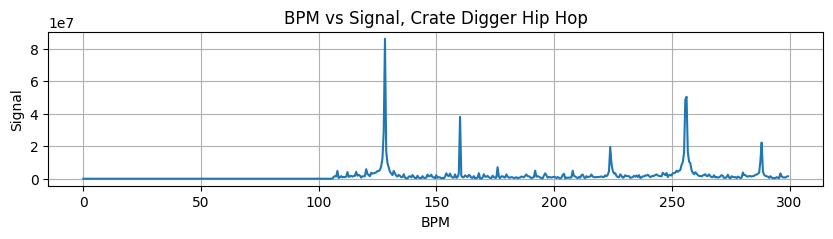

In [ ]:
# Example usage:
# Pop Rock Drumming at 128 bpm
bpmplot("/content/drive/My Drive/Fourth Year/App Physics 157/Project/Crate Digger 128.wav", name="Crate Digger Hip Hop")

<ipython-input-283-bd82e0f9e428>:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, data = wavfile.read(file_path)


[127.94940927632337, 255.89881855264673, 256.4168323553849, 192.18312081585412, 128.46742307906152]


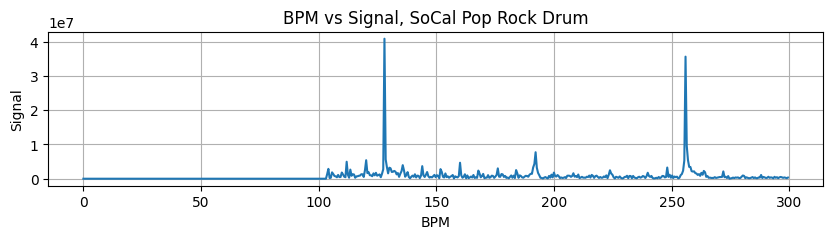

In [ ]:
# Example usage:
# Pop Rock Drumming at 128 bpm
bpmplot("/content/drive/My Drive/Fourth Year/App Physics 157/Project/Socal 128.wav", name="SoCal Pop Rock Drum")

In [ ]:
# Read audio file
samplerate, data = wavfile.read("/content/drive/My Drive/Fourth Year/App Physics 157/Project/Fearless (Original).wav")

bpmmax = 300

# Ensure mono audio
if data.ndim > 1:
    data = data[:, 0]

# Compute frequency resolution
minfreq = samplerate / len(data)

print("Frequency Resolution: ", minfreq)

# Partition the signal and compute norms of differences
partition_size = 128
n_partitions = len(data) // partition_size
print("Number of partitions: ", n_partitions)
signal = [
    np.linalg.norm(np.diff(data[i*partition_size:(i+1)*partition_size]))
    for i in range(n_partitions)
]

# # Apply FFT and take magnitude
# max_index = int(bpmmax / (120 * minfreq))
# fft_vals = np.abs(fft(signal))[:max_index]

# # Zero out very low frequencies
# fft_vals[:100] = 0

# # Prepare BPM x-axis
# bpm = [120 * i * minfreq for i in range(len(fft_vals))]

# # Plot
# plt.figure(figsize=(10, 6))
# plt.plot(bpm, fft_vals)
# plt.title("BPM vs Signal")
# plt.xlabel("BPM")
# plt.ylabel("Signal")
# plt.grid(True)
# plt.show()

<ipython-input-287-00411e26a609>:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, data = wavfile.read("/content/drive/My Drive/Fourth Year/App Physics 157/Project/Fearless (Original).wav")


Frequency Resolution:  0.004131466447620875
Number of partitions:  83392


10674176


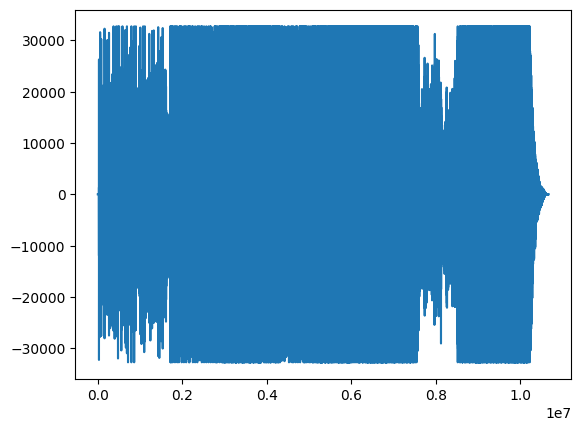

In [ ]:
plt.plot(data)
print(len(data))

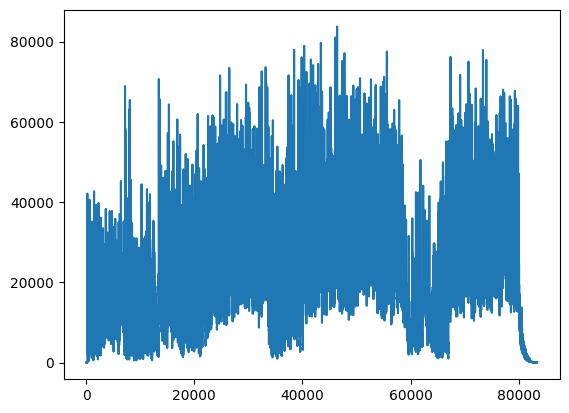

In [ ]:
plt.plot(signal)

Maximum FFT Index:  1210


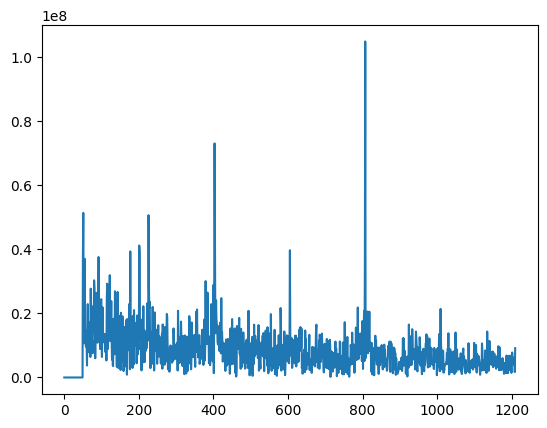

In [ ]:
# Apply FFT and take magnitude
max_index = int(bpmmax / (60 * minfreq))
print("Maximum FFT Index: ",max_index)
fft_vals = np.abs(fft(signal))[:max_index]
# # Zero out very low frequencies
fft_vals[:50] = 0

plt.plot(fft_vals)

bpm scale:  [0.0, 0.2478879868572525, 0.495775973714505, 0.7436639605717574, 0.99155194742901, 1.2394399342862623, 1.4873279211435149, 1.7352159080007674, 1.98310389485802, 2.2309918817152723, 2.4788798685725246, 2.7267678554297774, 2.9746558422870297, 3.222543829144282, 3.470431816001535, 3.718319802858787, 3.96620778971604, 4.214095776573292, 4.461983763430545, 4.709871750287797, 4.957759737145049, 5.2056477240023025, 5.453535710859555, 5.701423697716807, 5.9493116845740595, 6.197199671431312, 6.445087658288564, 6.692975645145817, 6.94086363200307, 7.188751618860322, 7.436639605717574, 7.684527592574827, 7.93241557943208, 8.180303566289332, 8.428191553146585, 8.676079540003837, 8.92396752686109, 9.171855513718342, 9.419743500575594, 9.667631487432846, 9.915519474290099, 10.163407461147353, 10.411295448004605, 10.659183434861857, 10.90707142171911, 11.154959408576362, 11.402847395433614, 11.650735382290867, 11.898623369148119, 12.146511356005371, 12.394399342862624, 12.642287329719876

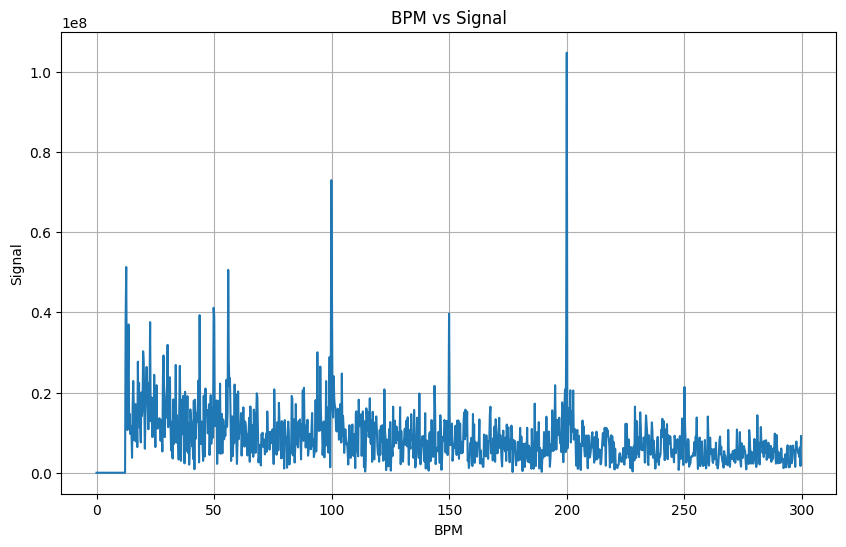

In [ ]:
# Prepare BPM x-axis
bpm = [60 * i * minfreq for i in range(len(fft_vals))]
print("bpm scale: ", bpm)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(bpm, fft_vals)
plt.title("BPM vs Signal")
plt.xlabel("BPM")
plt.ylabel("Signal")
plt.grid(True)
plt.show()

### Example Usage

<ipython-input-283-bd82e0f9e428>:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, data = wavfile.read(file_path)


[100.07166088074189, 199.89500498510475, 149.98333293292333, 200.14332176148378, 49.91167205218144]


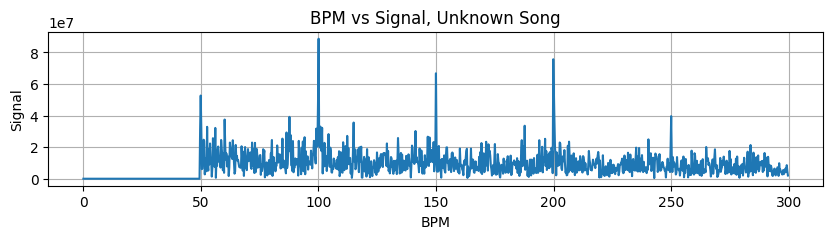

In [ ]:
# Example usage:
bpmplot("/content/drive/My Drive/Fourth Year/App Physics 157/Project/Fearless (Taylors Version).wav")

# Reputation

Source of bpm data: songbpm.com

[128.92363885401213, 86.03469923524713, 64.46181942700606, 59.068599474945785, 214.95833808925923]


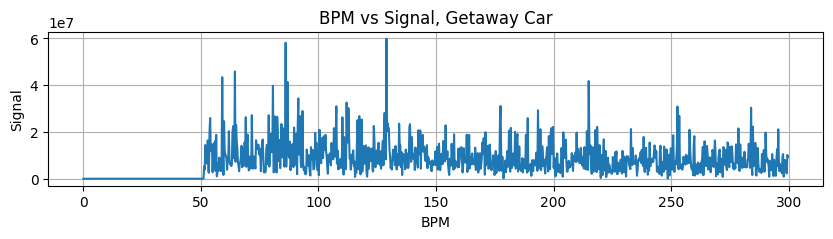

In [ ]:
# GETAWAY CAR
# https://songbpm.com/@taylor-swift/getaway-car
# Tempo: 172 bpm
bpmplot("/content/drive/My Drive/Fourth Year/App Physics 157/Project/Getaway Car.wav", name="Getaway Car")

[68.01002338585431, 102.01503507878147, 136.02004677170862, 272.04009354341724, 68.77132961778553]


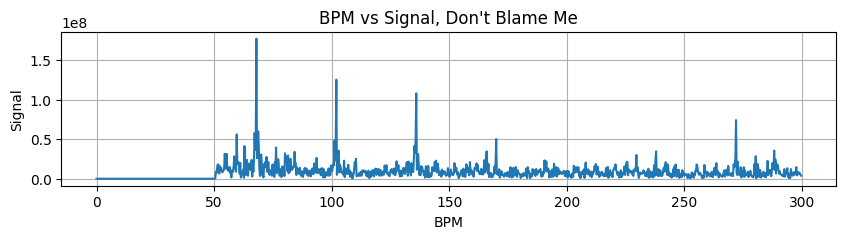

In [ ]:
# DON'T BLAME ME
# https://songbpm.com/@taylor-swift/don-t-blame-me
# Tempo: 136 bpm
bpmplot("/content/drive/My Drive/Fourth Year/App Physics 157/Project/Dont Blame Me.wav", name="Don't Blame Me")

[94.98225180777342, 189.96450361554685, 95.24176615697499, 94.46322310937029, 142.47337771166013]


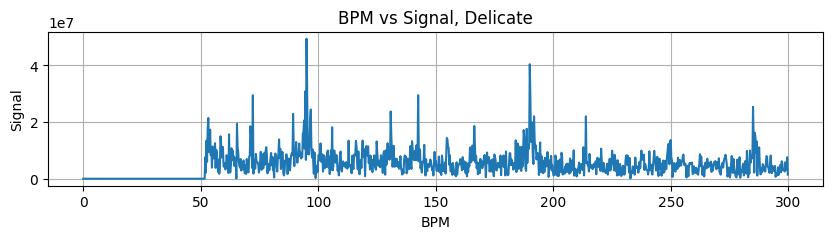

In [ ]:
# DELICATE
# https://songbpm.com/@taylor-swift/delicate-89792e6a-f808-4fdd-a25b-222ba68d8f33
# Tempo: 95 bpm
bpmplot("/content/drive/My Drive/Fourth Year/App Physics 157/Project/Delicate.wav", name="Delicate")

[128.06919642857142, 255.859375, 191.96428571428572, 256.13839285714283, 127.23214285714286]


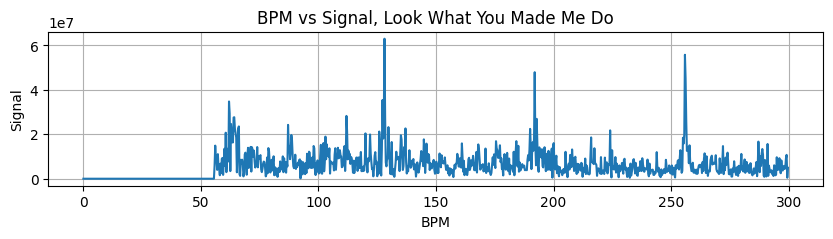

In [ ]:
# LOOK WHAT YOU MADE ME DO
# https://songbpm.com/@taylor-swift/look-what-you-made-me-do
# Tempo: 128 bpm
bpmplot("/content/drive/My Drive/Fourth Year/App Physics 157/Project/Look What You Made Me Do.wav", name="Look What You Made Me Do")

[159.914287257471, 120.72808353311775, 80.10121055419268, 65.40638415756021, 119.86368198037466]


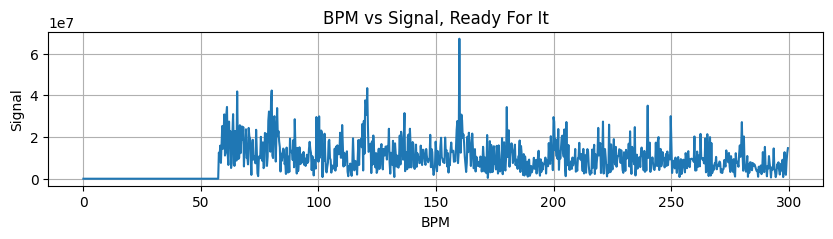

In [ ]:
# READY FOR IT
# https://songbpm.com/@taylor-swift/ready-for-it
# Tempo: 160 bpm
bpmplot("/content/drive/My Drive/Fourth Year/App Physics 157/Project/Ready For It.wav", name="Ready For It")

# 1989

[96.05406719025267, 144.08110078537902, 192.10813438050533, 191.84852879350467, 240.13516797563167]


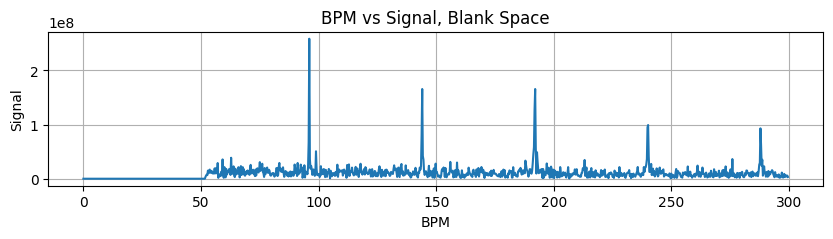

In [ ]:
# BLANK SPACE
# https://songbpm.com/@taylor-swift/blank-space
# Tempo: 96 bpm
bpmplot("/content/drive/My Drive/Fourth Year/App Physics 157/Project/Blank Space.wav", name="Blank Space")

[61.02877306466967, 244.1150922586787, 243.85539535202054, 183.08631919400904, 122.05754612933934]


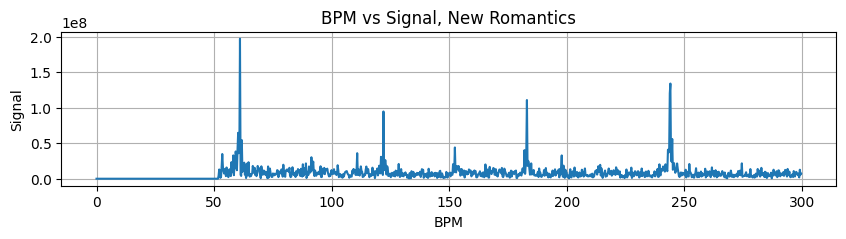

In [ ]:
# NEW ROMANTICS
# https://songbpm.com/@taylor-swift/new-romantics-taylor-s-version-eGO9fdqagL
# Tempo: 122 bpm
bpmplot("/content/drive/My Drive/Fourth Year/App Physics 157/Project/New Romantics.wav", name="New Romantics")

[160.0286745050815, 79.87756060766462, 59.90817045574846, 60.18172374550074, 80.15111389741689]


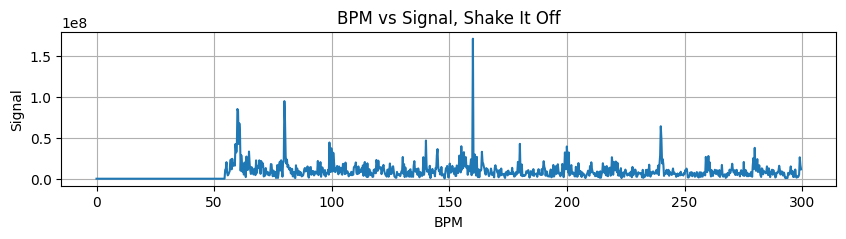

In [ ]:
# SHAKE IT OFF
# https://songbpm.com/@taylor-swift/shake-it-off-1000c4cd-c78c-4d56-8b14-ff6f354a3c45
# Tempo: 160 bpm
bpmplot("/content/drive/My Drive/Fourth Year/App Physics 157/Project/Shake It Off.wav", name="Shake It Off")

[190.01031869278745, 237.57788137511318, 71.22137800523086, 86.03750408661101, 94.875193328136]


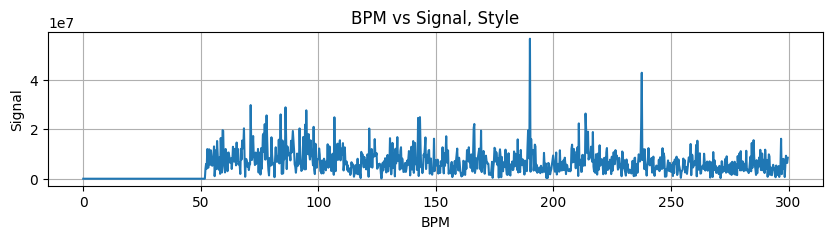

In [ ]:
# STYLE
# https://songbpm.com/@taylor-swift/style
# Tempo: 95 bpm
bpmplot("/content/drive/My Drive/Fourth Year/App Physics 157/Project/Style.wav", name="Style")

[84.92499041411043, 212.59555933665644, 255.05805454371165, 297.52054975076686, 127.38748562116564]


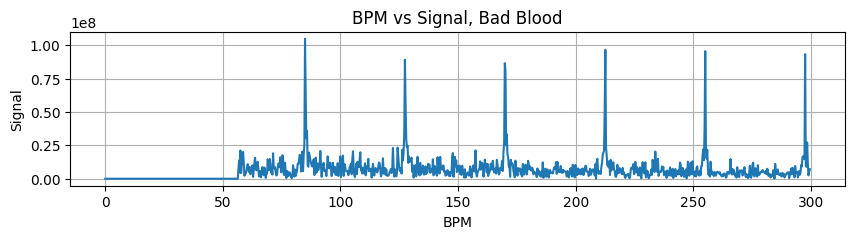

In [ ]:
# BAD BLOOD
# https://songbpm.com/@taylor-swift/bad-blood-c9a0e0c0-f7c1-4c63-aa9e-46b595113506
# Tempo: 170 bpm
bpmplot("/content/drive/My Drive/Fourth Year/App Physics 157/Project/Bad Blood.wav", name="Bad Blood")

# RED

[77.00709994538504, 154.01419989077007, 192.5177498634626, 115.51064991807756, 77.28017476788641]


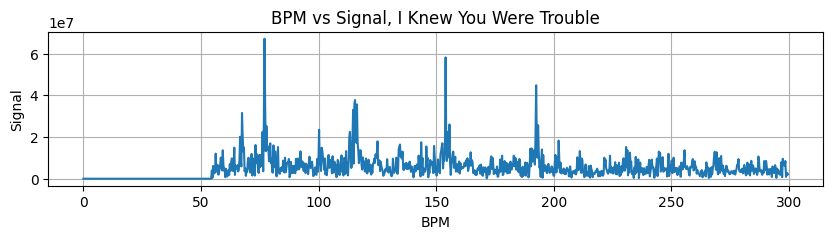

In [ ]:
# I KNEW YOU WERE TROUBLE
# https://songbpm.com/@taylor-swift/i-knew-you-were-trouble-taylor-s-version-w1W8fb41A4
# Tempo: 154 bpm
bpmplot("/content/drive/My Drive/Fourth Year/App Physics 157/Project/I Knew You Were Trouble.wav", name="I Knew You Were Trouble")

[171.99458998835127, 85.99729499417563, 171.0564376793239, 172.93274229737864, 129.15230120943468]


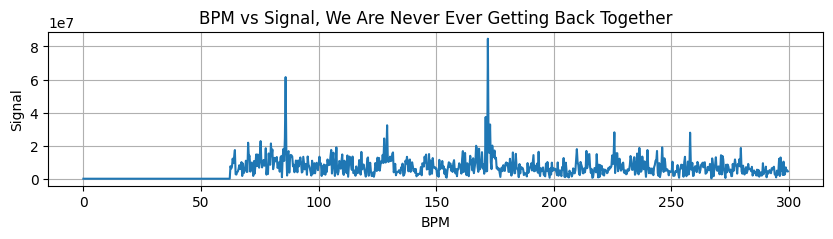

In [ ]:
# WE ARE NEVER EVER GETTING BACK TOGETHER
# https://songbpm.com/@taylor-swift/we-are-never-ever-getting-back-together-taylor-s-version-xZZqnCwMp_
# Tempo: 172 bpm
bpmplot("/content/drive/My Drive/Fourth Year/App Physics 157/Project/We Are Never Ever Getting Back Together.wav", name="We Are Never Ever Getting Back Together")

[103.92218397735958, 52.08451501003057, 51.83766896732901, 207.84436795471916, 156.00669898739017]


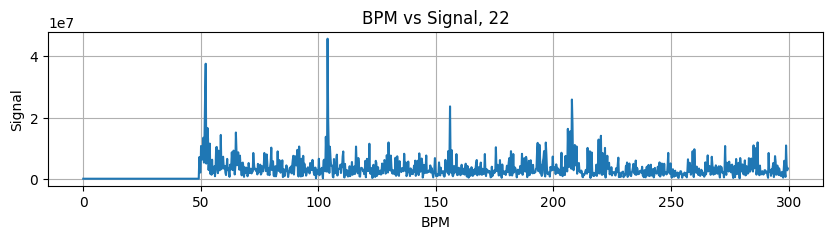

In [ ]:
# 22
# https://songbpm.com/@taylor-swift/22-taylor-s-version-hFVop2yU4E
# Tempo: 104 bpm
bpmplot("/content/drive/My Drive/Fourth Year/App Physics 157/Project/22.wav", name="22")

[130.04113875912694, 64.91913323388553, 260.0822775182539, 194.96027199301247, 65.12200552524142]


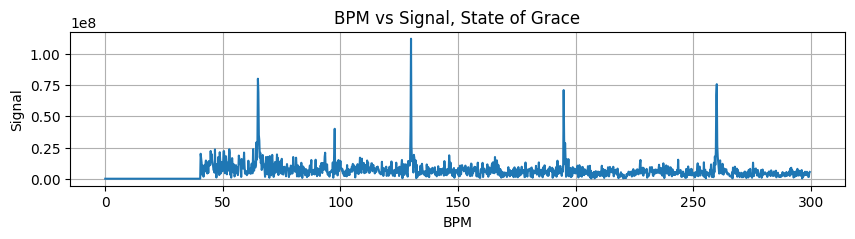

In [ ]:
# STATE OF GRACE
# https://songbpm.com/@taylor-swift/state-of-grace-taylor-s-version-m5e1mtmKC1
# Tempo: 130 bpm
bpmplot("/content/drive/My Drive/Fourth Year/App Physics 157/Project/State Of Grace.wav", name="State of Grace")

[249.89866530040467, 54.69884948635467, 62.47466632510117, 250.16679691553387, 70.25048316384766]


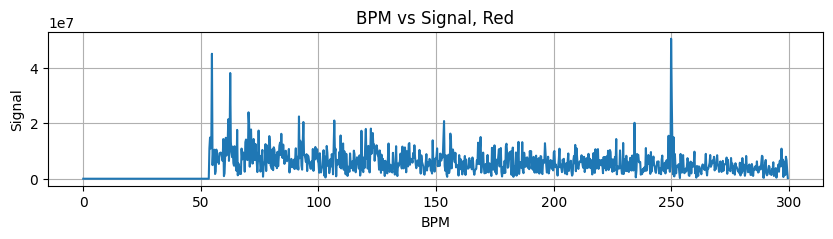

In [ ]:
# RED
# https://songbpm.com/@taylor-swift/red-taylor-s-version-4OG2CEQqO1
# Tempo: 125 bpm
bpmplot("/content/drive/My Drive/Fourth Year/App Physics 157/Project/Red.wav", name="Red")

# Lover

[169.85818614130434, 127.39363960597825, 212.6570991847826, 170.1925526494565, 297.58619225543475]


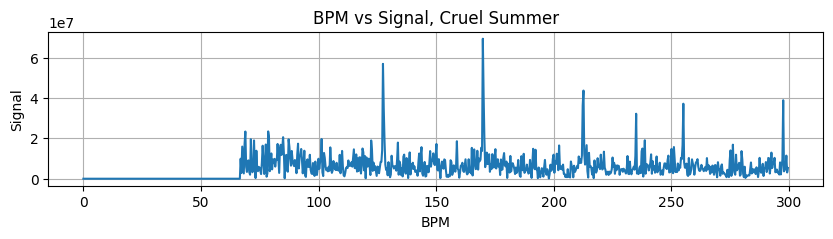

In [ ]:
# CRUEL SUMMER
# https://songbpm.com/@taylor-swift/cruel-summer
# Tempo: 170 bpm
bpmplot("/content/drive/My Drive/Fourth Year/App Physics 157/Project/Cruel Summer.wav", name="Cruel Summer")

[169.85205659945007, 81.88087190650779, 127.21986709440881, 84.92602829972503, 118.76109933547205]


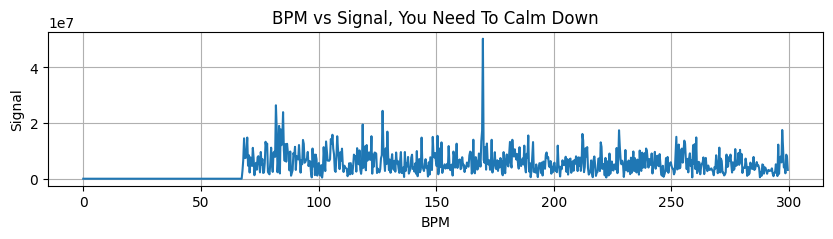

In [ ]:
# YOU NEED TO CALM DOWN
# https://songbpm.com/@taylor-swift/you-need-to-calm-down-faf6de15-693c-4e58-a279-6c14585eb8ea
# Tempo: 85 bpm
bpmplot("/content/drive/My Drive/Fourth Year/App Physics 157/Project/You Need To Calm Down.wav", name="You Need To Calm Down")

[182.01418114255014, 91.00709057127507, 136.3563865508596, 273.02127171382523, 227.36347712213467]


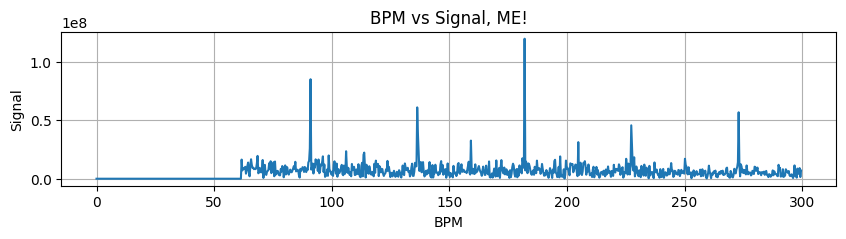

In [ ]:
# ME!
# https://songbpm.com/@taylor-swift/me-feat-brendon-urie-of-panic-at-the-disco-6595a44d-b655-496a-a5ed-f218e543eff6
# Tempo: 182 bpm
bpmplot("/content/drive/My Drive/Fourth Year/App Physics 157/Project/ME!.wav", name="ME!")

[220.10033281335444, 82.45924149560145, 219.78679957572857, 164.9184829912029, 274.9686493978801]


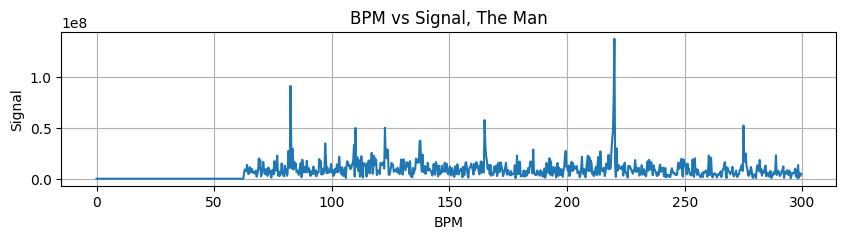

In [ ]:
# THE MAN
# https://songbpm.com/@taylor-swift/the-man
# Tempo: 110 bpm
bpmplot("/content/drive/My Drive/Fourth Year/App Physics 157/Project/The Man.wav", name="The Man")

[103.91790014808272, 208.10432200197445, 207.83580029616544, 104.18642185389173, 104.72346526550972]


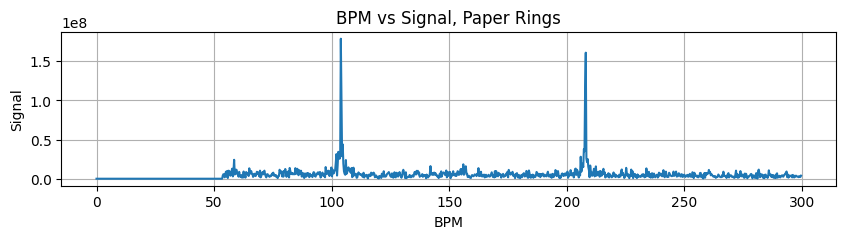

In [ ]:
# PAPER RINGS
# https://songbpm.com/@taylor-swift/paper-rings
# Tempo: 104 bpm
bpmplot("/content/drive/My Drive/Fourth Year/App Physics 157/Project/Paper Rings.wav", name="Paper Rings")